Pre-class workbook
CS114. Lesson 3. Causality.

Time guide: You should allocate approximately 2½ hours to preparing for class, including reading the study guide and doing the pre-class exercises.

### Session video

Here is the link for today's summary video. If you have any questions, make sure to ask them below. 

### Introduction

You won’t find the words “causal” or “causality” in the Blitzstein textbook. How can that be? Virtually all processes we care about are causal and very many academic fields of study aim to create causal models of parts of the natural world. And yet, Probability and Statistics are acausal fields – they make statements about correlations and not causations.

In the first two lessons, we discussed Probability as the framework behind data generating processes (or simulations) and Statistics as the framework behind determining which data generating process or processes could have resulted in observed data. With Probability, the model generates hypothetical data; with Statistics, we start with the observed data set and infer which hypothetical model(s) could have generated it.

Framing Probability and Statistics in this way, we can see that there is some notion of causality baked in already. A data generating process is a causal process since it leads from inputs (parameters) to outputs, namely simulated data or distributions over data.

The big exception to this generative modeling approach is when we don’t have access to a simulation. This happens all the time when the only thing we have is observational data. For example, country C implemented policy P, and then, 10 years later, we observe an improvement in some social metric M. Did P cause the improvement in M? Or was there some other cause for the improvement in M? This is a classic problem in economics but we have no way of answering it with probability theory alone since we don’t have a data generating process for complex historical social processes. We can describe the correlation between some observed events but draw no conclusion about whether P caused a change in M.

Today’s lesson is basically a Warning! label on CS114. We can study causality using probability and statistics but we have to be really careful how we do it. By default, we use probability and statistics to study correlation and we need to add something extra to study causation.

A detailed discussion of how we might uncover causal structure from observational data is the topic of a whole other course, namely CS130. We cover the basic concepts in this lesson and will use some of the tools typically used in Causal Inference to help us better understand topics in Probability and Statistics.

### Question 1 of 2
Any questions?

Are there any questions you would like us to discuss during the class? As you go through the readings and exercises in this workbook, return to this point and make a list of questions you would like us to clear up in class.

### Causal graphs (DAGs)

Graphs, like the one shown below, can be used to represent statistical models. They provide a concise, visual summary of a model but without outlining all the mathematical details required to fully specify a model. Even though a graph doesn't fully specify a model, it is a great tool and form of notation for statistical models.

Run the code cell below.



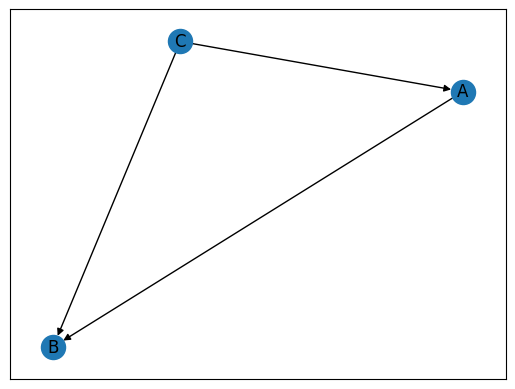

In [2]:
# The NetworkX library is useful for creating and manipulating graphs/networks.
import networkx as nx

# Create a directed graph (DiGraph) with 3 edges, provided as a list of pairs of
# nodes, (from node, to node).
graph = nx.DiGraph([("A", "B"), ("C", "A"), ("C", "B")])

nx.draw_networkx(graph)



The “G” in DAG is for “graph”. In mathematics, a graph is defined as a collection of nodes (the circles above) and edges (the lines above) connecting nodes. Each node represents a variable in a statistical model and every edge represents a relationship between two variables.

The “D” in DAG is for “directed”. A graph can be directed or undirected. Directed graphs have arrows while undirected graphs do not. In this course, we use only directed graphs.

We'll get to the “A” in DAG soon.

The importance of the directed edges is that they represent direct causal effects. In the graph above, let's say

- Node A represents having high blood pressure
- Node B represents suffering from heart disease
- Node C represents being a smoker

The graph tells us that

- having high blood pressure (A) has a causal effect on suffering from heart disease (B),
- smoking (C) affects your blood pressure (A),
- smoking (C) also affects your risk of heart disease (B) directly (not via blood pressure).

The graph visualizes how the variables in a model are connected in terms of their causal effects.

### Graph terminology: The family tree

If there is a directed edge from A to B, A is called a parent of B and B is called a child of A. Each node can have any number of parents or children including 0 parents or 0 children.

A directed path is a sequence of edges that we can trace out in the graph, following the directions of the arrows. A directed path may never go against the direction of the arrows.

If there is a directed path from C to D, possibly via some other nodes, then C is called an ancestor of D and D is called a descendant of C. Every node along a directed path is a descendant of the first node on the path, and also an ancestor of the last node on the path.

A cycle is a directed path that starts and ends at the same node. It is a path that allows you to follow the arrows from a node, E, go through some other nodes, and then end up back at E. Cycles are not allowed in graphs of causal models since causality flows forward in time. If A is a cause of B, then B can't also be a cause of A.

The “A” in DAG is for “acyclic”.

Every causal graph is a directed acyclic graph (DAG). It has directed edges representing the direct causal effects between the nodes (variables) and may contain no cycles.

### Required exercises

Answer the questions below using this graph.

Run the code cell below.



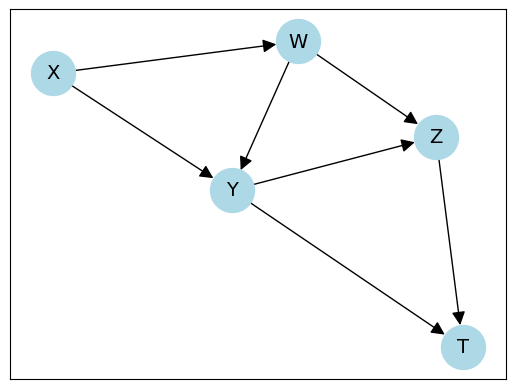

In [3]:
# The NetworkX library is useful for creating and manipulating graphs/networks.
import networkx as nx

# Create a directed graph (DiGraph) with 3 edges, provided as a list of pairs of
# nodes, (from node, to node).
graph = nx.DiGraph(
    [("X", "Y"), ("X", "W"), ("W", "Y"), ("W", "Z"), ("Y", "Z"), ("Y", "T"), ("Z", "T")]
)

# Draw the graph, making the nodes, arrows, and text a bit larger than the
# default.
nx.draw_networkx(
    graph, arrowsize=20, node_size=1000, node_color="lightblue", font_size=14
)



(a) List all the parents of Z.



In [4]:
"""
Your explanation here.
"""

# Provide your answer as a list by replacing the ... below with the letters of
# the parents of Z – for example, answer = ['X', 'Y'].

answer = ["W", "Y"]



(b) List all the ancestors of Z.



In [5]:
"""
Your explanation here.
"""

# Provide your answer as a list, for example answer = ['X', 'Y']

answer = ["Y", "W", "X"]



(c) List all the children of W.



In [6]:
"""
Your explanation here.
"""

# Provide your answer as a list. For example, answer = ['X', 'Y']

answer = ["Z", "Y"]



(d) List all the descendants of W.



In [7]:
"""
Your explanation here.
"""

# Provide your answer as a list. For example, answer = ['X', 'Y']

answer = ["Y", "Z", "T"]



(e) List all the directed paths between X and T.

Hint: There are 5 directed paths between X and T.



In [8]:
"""
Your explanation here.
"""

# Provide your answer as a list of lists where each sub-list represents a path
# from X to T. For example, answer = [['X', 'A', 'T'], ['X', 'A', 'B', 'T']].

answer = [
    ["X", "Y", "T"],
    ["X", "W", "Z", "T"],
    ["X", "W", "Y", "T"],
    ["X", "Y", "Z", "T"],
    ["X", "W", "Y", "Z", "T"],
]



### Drawing and interpreting graphs

You should practice translating a description of a model or a scenario into a graph. Each variable in the model is represented by a node and each direct causal relationship is represented by a directed edge.

### Required exercise: Draw a DAG

The salary and employer pays an employee depends on their education and their experience, meaning the number of years they have been in a job. Represent salary with S, years of education as E, and years of experience as X.

(a) Draw the DAG representing this scenario.



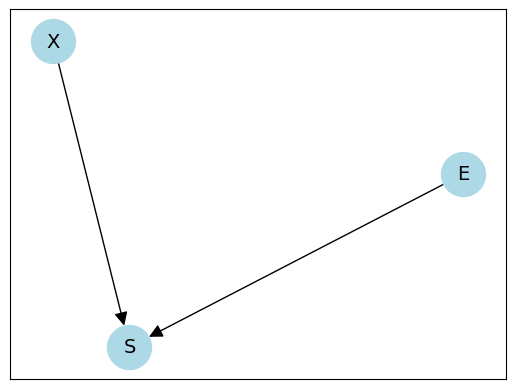

In [9]:
"""
Your explanation here.
"""

# Write your answer as a NetworkX graph. You have to provide the edges of the
# graph.

import networkx as nx

answer = nx.DiGraph(
    [
        ("E", "S"),
        ("X", "S"),
    ]
)

# Draw the graph. (You don't have to modify this code.)
nx.draw_networkx(
    answer, arrowsize=20, node_size=1000, node_color="lightblue", font_size=14
)



(b) A colleague suggests that the model described above might be incomplete. They propose a different model where there is one more variable, namely the gender G of the employee. According to their model, both the education E and the S of an employee are affected by the employee's gender.

Draw a DAG representing this model.



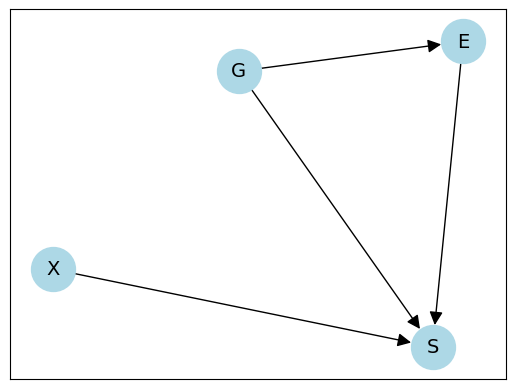

In [10]:
"""
Your explanation here.
"""

# Write your answer as a NetworkX graph. You have to provide the edges of the
# graph.

import networkx as nx

answer = nx.DiGraph(
    [
        ("E", "S"),
        ("X", "S"),
        ("G", "S"),
        ("G", "E"),
    ]
)

# Draw the graph. (You don't have to modify this code.)
nx.draw_networkx(
    answer, arrowsize=20, node_size=1000, node_color="lightblue", font_size=14
)



### Optional exercise: Draw another DAG

The simulations we have implemented already can all be represented by graphs. Each simulation contains causal information about the variables involved since the values of some variables depend on the values of other variables.

Consider the following simulation (you don't necessarily have to run it) and draw the DAG corresponding to it. There are 6 variables in the simulation (a, b, u1, u2, u3, x) and they should all be present in your graph.



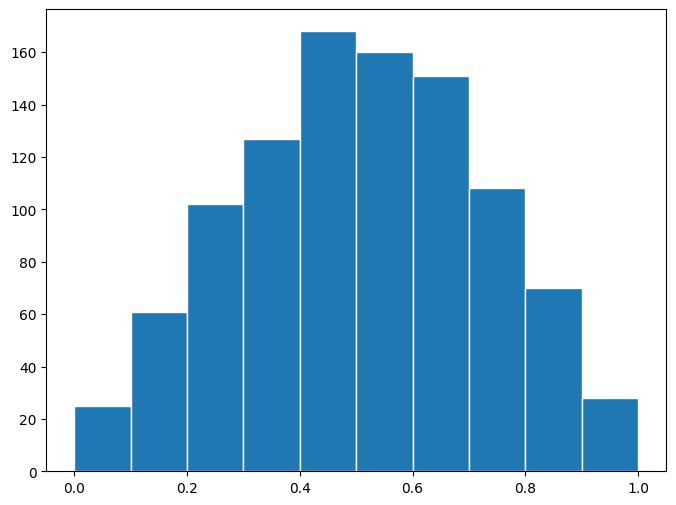

In [11]:
def simulation(a, b):
    import random
    from numpy import median

    u1 = random.uniform(a, b)
    u2 = random.uniform(a, b)
    u3 = random.uniform(a, b)
    x = median([u1, u2, u3])
    return x


outputs = [simulation(0, 1) for i in range(1000)]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(outputs, range=(0, 1), bins=10, edgecolor="white")
plt.show()



Question: What is the DAG corresponding to this simulation?



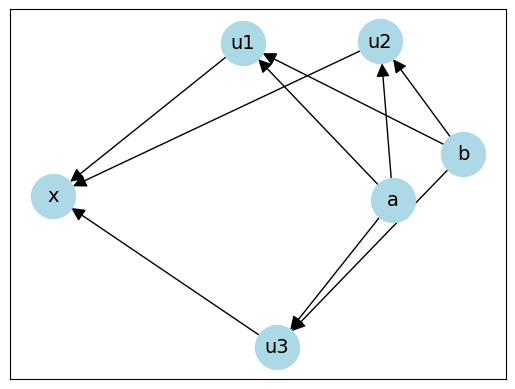

In [12]:
# Write your answer as a NetworkX graph. You have to provide the edges of the
# graph.

import networkx as nx

answer = nx.DiGraph(
    [
        ("a", "u1"),
        ("a", "u2"),
        ("a", "u3"),
        ("b", "u1"),
        ("b", "u2"),
        ("b", "u3"),
        ("u1", "x"),
        ("u2", "x"),
        ("u3", "x"),
    ]
)

# Draw the graph. (You don't have to modify this code.)
nx.draw_networkx(
    answer, arrowsize=20, node_size=1000, node_color="lightblue", font_size=14
)



### Simpson's paradox

This is the main example we discuss in class. We will write simulations to understand and explore Simpson's paradox.

### Video

Watch from 14:26 to 33:54 (19.5 minutes) of Huszár, F. (2019). Causal Inference in everyday Machine Learning, Part 1. Machine Learning Summer School 2019.

- The first 3.5 minutes provide a short overview of the types of questions we can answer with Causal Inference that we cannot answer Statistics alone.
- A classic example of a situation where Statistics fails to provide answers is Simpson's paradox, presented during the next 9.5 minutes of the segment.
- The final 6.5 minutes of this video segment explain Simpson's paradox in terms of confounding, a concept you encountered in Formal Analyses, and using DAGs.

### Required exercise

Draw a DAG to represent Simpson's paradox as presented in Huszár (2019). Use the following notation.

- S – the size of the patient's kidney stone (small or large).
- T – the treatment provided to the patient (invasive or not invasive).
- O – the outcome of the treatment (improved or not improved).



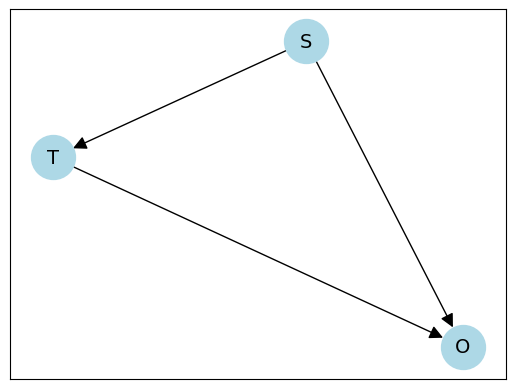

In [13]:
# Write your answer as a NetworkX graph. You have to provide the edges of the
# graph.

import networkx as nx

answer = nx.DiGraph(
    [
        ("S", "T"),  # Stone size influences treatment choice
        ("S", "O"),  # Stone size influences outcome
        ("T", "O"),  # Treatment influences outcome
    ]
)

# Draw the graph. (You don't have to modify this code.)
nx.draw_networkx(
    answer, arrowsize=20, node_size=1000, node_color="lightblue", font_size=14
)



### Required reading

Read §1.2 of Pearl, J., Glymour, M., Jewell, N.P. (2016). Causal Inference in Statistics: A Primer. Wiley & Sons. (2550 words ≈ 25 minutes)

Chapter samples are available on the book website. Read the first 5 pages of Chapter 1.

### Prep question
Question 2 of 2
Even though Tables 1.1 and 1.2 in Pearl, et al. (2016) contain exactly the same numeric data, why are the conclusions about the effectiveness of treatment in the two scenarios resulting in these tables different? Briefly describe all the relevant factors.

The conclusions about the drug’s effectiveness differ in Tables 1.1 and 1.2 due to Simpson’s paradox, where aggregated data can show a misleading trend compared to stratified data.

In Table 1.1, when recovery rates are analyzed by gender, the drug appears effective for both men and women. However, when combined, the overall recovery rate is higher without the drug. This paradox arises because of unequal proportions of men and women in the treatment groups, with men (who recover at a higher rate) being overrepresented in the drug group, skewing the overall results.

In Table 1.2, the same data is stratified by posttreatment blood pressure (BP), which is more directly related to medical outcomes. While the drug seems effective within both low and high BP groups, the combined data again suggests higher recovery without the drug. The difference in conclusions between the two tables shows how the choice of confounder (gender in Table 1.1 vs. BP in Table 1.2) impacts the interpretation of the drug’s effectiveness.

### Writing simulations

There are two skills you should practice to be ready for writing simulations in today's class session.

- How to generate binary outcomes (yes/no, improved/not improved, high/low blood pressure, etc.) with particular probabilities.
- How to draw tree diagrams and implement them as simulations. You learned how to do this in Formal Analyses but it might be worth revising the main reading from that class, namely Section 2.2.6 on pp. 95–97 of Diez, D., et al. (2015). OpenIntro Statistics (3rd ed.).

### Generating random binary outcomes

Assume there are 2 possible outcomes for a random variable – for example, improved or not improved – and we know the probabilities of the two outcomes, call them p1 and p2 = 1 − p1. The simplest way of generating random outcomes is to use random.uniform(0, 1) which generates a random real number between 0 and 1 with equal probability assigned to all possible values.

By comparing a random value between 0 and 1 to the known probability of the first outcome, p1, we can decide whether to choose the first outcome or the second outcome.



In [14]:
if random.uniform(0, 1) < p1:

SyntaxError: incomplete input (3299501449.py, line 1)



If p1 = 0.3, for example, the if-statement above will be True about 30% of the time and False about 70% of the time.

### Demonstration: Run the code cell below.

We get "improved" about 300 times out of 1000 and "not improved" about 700 times out of 1000.



In [ ]:
import random

p = 0.2  # The probability of getting the 'improved' outcome. Implicitly, the
# probability of getting the 'not improved' outcome is 1 - 0.3 = 0.7.

# Count the number of times we get each outcome
counts = {"improved": 0, "not improved": 0}

# Simulate 1000 random outcomes
for i in range(1000):
    if random.uniform(0, 1) < p:  # This is the key line for getting the
        # correct probabilities for the two outcomes.
        counts["improved"] += 1
    else:
        counts["not improved"] += 1

# Plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.bar(counts.keys(), counts.values())
plt.show()



### Required exercise: Tree diagrams and simulations

If you get a tree diagram like the one below, you can translate it into a simulation by following the branches of the tree with the correct probabilities (written on the tree). To make sure you get the correct probabilities, use the random.uniform technique above.

Complete the code below. If you do this correctly, the fraction of times you eat ice cream should be approximately 0.55.



In [ ]:
import random

def simulation():
    p_sunny = 0.75
    p_tea_if_sunny = 0.3
    p_tea_if_not_sunny = 0.9

    # Determine if the weather is sunny or not sunny
    if random.uniform(0, 1) < p_sunny:
        weather = 'sunny'
        # Decide whether to drink tea or eat ice cream when it's sunny
        if random.uniform(0, 1) < p_tea_if_sunny:
            food = 'tea'
        else:
            food = 'ice cream'
    else:
        weather = 'not sunny'
        # Decide whether to drink tea or eat ice cream when it's not sunny
        if random.uniform(0, 1) < p_tea_if_not_sunny:
            food = 'tea'
        else